<a href="https://colab.research.google.com/github/cookie13v/Ruhi-DataScience/blob/main/DS_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/test.csv')
display(df.head())

,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,...,Cereal Consumption Rye,Cereal Consumption Barley,Cereal Consumption Sorghum,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
4,Afghanistan,1991,Female,52.119,110.7,102.1,120.4,167.1,153.0,182.6,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28


I asked AI to import the CSV file and create a dataframe to perform EDA.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22050 entries, 0 to 22049
Columns: 150 entries, Country to Diet Calories Carbohydrates
dtypes: float64(147), int64(1), object(2)
memory usage: 25.2+ MB


In [ ]:
display(df.dtypes)

,0
Country,object
Year,int64
Gender,object
Life Expectancy,float64
Infant Mortality Rate,float64
...,...
Cereal Consumption Rice,float64
Diet Calories Animal Protein,float64
Diet Calories Plant Protein,float64
Diet Calories Fat,float64


I asked AI to generate the code for the datatypes and information of the items in the data frame.

In [ ]:
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0].sort_values(ascending=False))

,0
Reproductive Age Women,21708
Air Pollution Death Rate Ischaemic Heart Disease,21513
Low CI Value Air Pollution Death Rate Stroke,21513
High CI Value Air Pollution Death Rate Stroke,21513
Low CI Value Air Pollution Death Rate Stroke Age Standarized,21513
...,...
Homicide Rate,5726
% Population Aged 65+,5364
% Population Aged 15-64,5364
% Population Aged 0-14,5364


AI gave me the code to check for missing values. Checking for missing values is very important as it can create problems during analysis.

Here we can see that there are lots of missing values in this dataset.

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
display(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

,0
Reproductive Age Women,98.448980
Air Pollution Death Rate Ischaemic Heart Disease,97.564626
Low CI Value Air Pollution Death Rate Stroke,97.564626
High CI Value Air Pollution Death Rate Stroke,97.564626
Low CI Value Air Pollution Death Rate Stroke Age Standarized,97.564626
...,...
Homicide Rate,25.968254
% Population Aged 65+,24.326531
% Population Aged 15-64,24.326531
% Population Aged 0-14,24.326531


In [ ]:
# Re-calculating missing percentage to ensure the latest state
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Re-identifying columns with high missing percentage
columns_with_high_missing_percentage = missing_percentage[missing_percentage > 50].index.tolist()

# Dropping the identified columns from the original DataFrame
df_cleaned = df.drop(columns=columns_with_high_missing_percentage)

display(f"Original DataFrame shape: {df.shape}")
display(f"Cleaned DataFrame shape: {df_cleaned.shape}")

'Original DataFrame shape: (22050, 150)'

'Cleaned DataFrame shape: (22050, 60)'

i asked AI to generate a code to drop columns where the missing values were > 50%. As they are so greater in missing values theres only one solution right now and that is to drop those as it would create biases and noise.

In [ ]:
# Re-checking missing values in the cleaned DataFrame
print("Missing values before imputation:")
display(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0].sort_values(ascending=False))

# Identify numerical and categorical columns
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Impute numerical columns with median
for col in numerical_cols:
    if df_cleaned[col].isnull().any():
        median_val = df_cleaned[col].median()
        df_cleaned[col] = df_cleaned[col].fillna(median_val)
        print(f"Imputed numerical column '{col}' with median: {median_val}")

# Impute categorical columns with mode
for col in categorical_cols:
    if df_cleaned[col].isnull().any():
        mode_val = df_cleaned[col].mode()[0] # [0] to handle cases with multiple modes
        df_cleaned[col] = df_cleaned[col].fillna(mode_val)
        print(f"Imputed categorical column '{col}' with mode: {mode_val}")

# Verify no more missing values
print("\nMissing values after imputation:")
display(df_cleaned.isnull().sum().sum())

Missing values before imputation:


,0



Missing values after imputation:


np.int64(0)

So here, i have generated a code from AI to put mean in place of missing values in numerical categories and to put mode in place of missing values in categorial categories.

In [ ]:
display(df_cleaned.head())

,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,...,Fruit Consumption Pineapples,Cereal Consumption Oats,Cereal Consumption Barley,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,...,0.0,1.0,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,...,0.0,1.0,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,...,0.0,1.0,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,...,0.0,1.0,94.0,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
4,Afghanistan,1991,Female,52.119,110.7,102.1,120.4,167.1,153.0,182.6,...,0.0,1.0,94.0,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28


Code to show and check the dataframe.

In [ ]:
duplicate_rows_count = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows in df_cleaned: {duplicate_rows_count}")

Number of duplicate rows in df_cleaned: 0


There are no duplicates so we can move forward.

In [ ]:
display(df_cleaned.describe())

,Year,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,% Population Aged 0-14,% Population Aged 15-64,...,Fruit Consumption Pineapples,Cereal Consumption Oats,Cereal Consumption Barley,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
count,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,...,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000
mean,2004.500000,69.011830,29.487496,26.086931,33.424893,40.505883,35.544615,46.542976,31.125612,61.866149,...,2.362462,3.068889,7.679955,138.154785,522.434875,224.154830,127.686737,166.738500,688.624951,1684.482805
std,8.655638,9.691938,26.838320,24.523879,30.072169,44.716966,40.367845,50.693056,9.467157,6.203892,...,4.716283,7.003476,25.730687,200.256157,284.982206,274.136566,60.602575,27.878633,237.376050,171.592158
min,1990.000000,24.834000,1.420000,0.780000,1.780000,1.680000,0.850000,2.220000,8.629462,44.771249,...,0.000000,-21.000000,0.000000,0.000000,0.000000,0.000000,12.760000,82.800000,137.790000,892.180000
25%,1997.000000,63.082000,14.412500,12.730000,16.292500,16.850000,14.890000,18.962500,24.174300,57.439627,...,0.920000,1.000000,1.000000,58.000000,405.000000,94.000000,108.320000,160.160000,623.070000,1662.130000
50%,2004.500000,71.134000,21.410000,18.450000,24.440000,25.280000,21.820000,29.160000,30.932919,63.037251,...,1.340000,1.000000,2.000000,78.000000,501.000000,129.000000,119.400000,163.840000,657.135000,1684.750000
75%,2012.000000,76.254000,32.287500,27.845000,37.880000,40.327500,34.277500,47.727500,38.552515,65.866411,...,1.890000,1.000000,2.000000,101.000000,568.000000,194.000000,132.080000,167.440000,695.880000,1707.240000
max,2019.000000,87.747000,189.200000,173.300000,207.600000,331.100000,309.400000,354.400000,53.039474,90.881279,...,98.210000,97.000000,486.000000,1435.000000,1769.000000,1754.000000,405.160000,330.760000,1542.240000,2564.870000


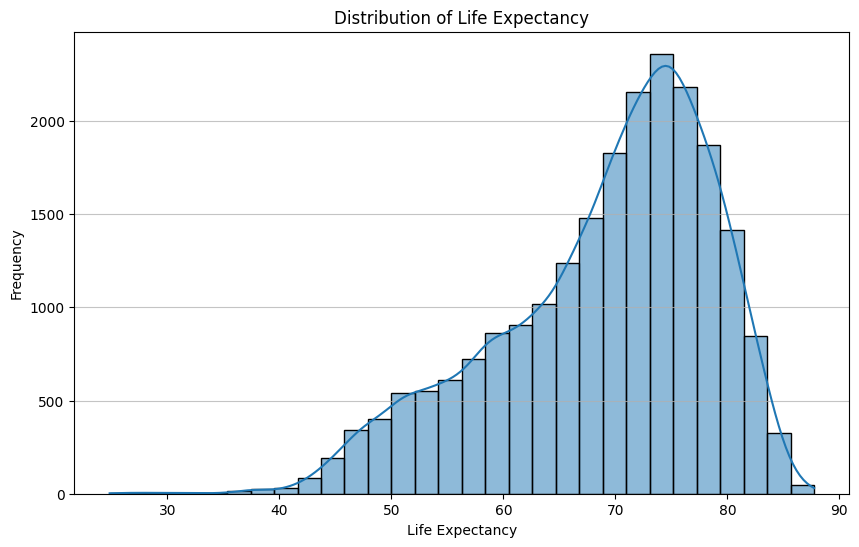

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Life Expectancy'], kde=True, bins=30)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

i asked AI to generate the histogram of life expectancy.

The graph is a bit left skewed. There are some low years/values in some countries.

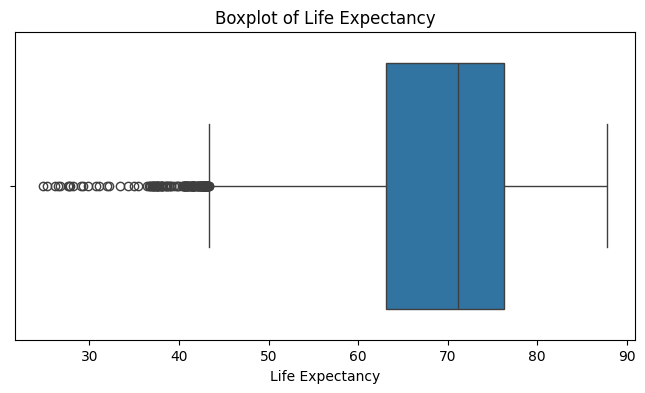

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Life Expectancy'])
plt.title("Boxplot of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.show()

The box plot, generated code by AI, shows that the whiskers on the extreme left might be possible outliers, but i believe it might also show deaths on some countries happen at an earlier age.

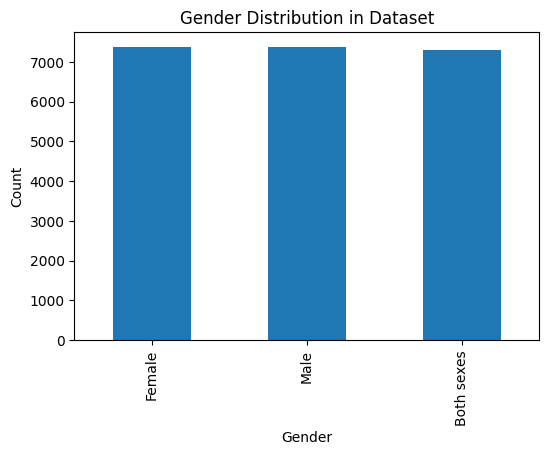

In [ ]:
plt.figure(figsize=(6,4))
df['Gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution in Dataset")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

I asked AI to generate the bar chart for the genders and it shows that both the genders have similar count. This is a balanced dataset.

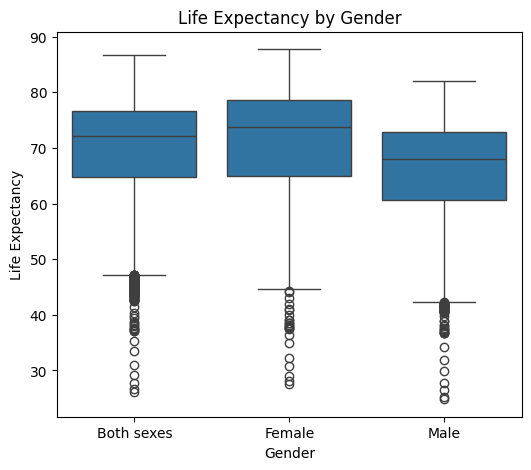

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Gender', y='Life Expectancy', data=df)
plt.title("Life Expectancy by Gender")
plt.show()

Comparing both genders, we can see that the female gender has a higher life expectancy rate compared to male. This can also give information on on the healthcare depending on different genders.

Now moving on to the Machine learning modelling

In [ ]:
y = df['Life Expectancy']
X = df.drop('Life Expectancy', axis=1)

As the question states to predict life expectancy. i generated the code using AI

In [ ]:
X = pd.get_dummies(X, drop_first=True)

As mention in github, i am using one hot encoding to convert categorical data to numeric ones.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (17640, 429)
Shape of X_test_scaled: (4410, 429)


AI generated coding for scaling. MinMaxscaling helps to put all values between 0-1. as in modelling, numbers with higher values are given more importance, so to make it fair, all values are scaled down.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17640, 429)
(4410, 429)
(17640,)
(4410,)


i asked AI to train test and split. 80/20 format is used to that the 80% of the data is the trained one and the other 20% we can test it.

Here the model is prepared for modelling. We can use different regression tools to further predict and test the data.